<a href="https://colab.research.google.com/github/paulcodrea/reddit_humor/blob/main/Humour_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Get reddit /r/dadjokes data
import requests
import pandas as pd

In [45]:
url = "https://www.reddit.com/r/dadjokes.json"
resp = requests.get(url=url, headers = {'User-agent': 'Humour detection bot'}, params = {'limit': '100'})
data = resp.json()
data_list = []
data_list.append(data)
# repeat process 9 more times with updated 'after' param
for i in range(20):
  after_param = data['data']['after'] 
  data = requests.get(url=url, headers = {'User-agent': 'Humour detection bot'}, params = {'after': after_param, 'limit': '100'})
  data_2 = data.json()
  data_list.append(data_2)
  data = data_2

In [46]:
# create a list of all jokes in json format
data = []
for collection in data_list:
  collection_list = collection['data']['children']
  for joke_index in range(len(collection_list)):
    data.append(collection_list[joke_index]['data'])

### Save only important columns in dataframe

In [48]:
df = pd.DataFrame(data)
clean_df = pd.DataFrame()

clean_df['title'] = df['title']
clean_df['selftext'] = df['selftext']
clean_df['ups'] = df['ups']
clean_df['downs'] = df['downs']
clean_df['upvote_ratio'] = df['upvote_ratio']
clean_df['total_awards_received'] = df['total_awards_received']

### Plot the stats of the reddit jokes

Number of jokes with upvotes different from zero:  1882
Number of jokes with no engagement:  128
Average number of upvotes:  222.8407960199005
Average upvote ratio:  0.8387611940298508


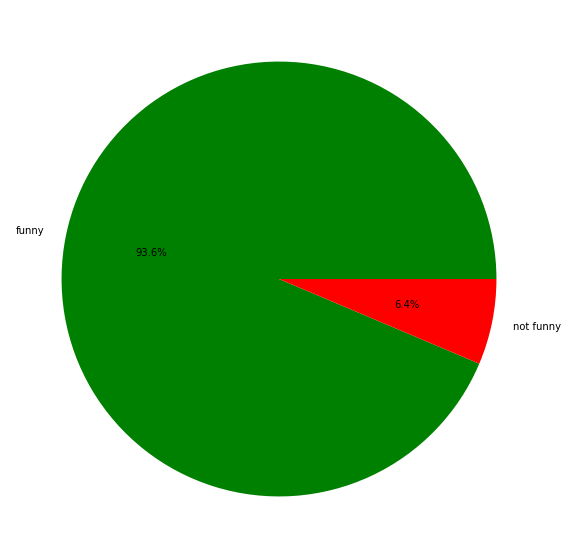

In [53]:
# print out as a pie chart how many jokes are funny or not
from matplotlib import pyplot as plt

# calculate number of posts with upvotes different grater than downvotes
funny = clean_df[clean_df['ups'] > clean_df['downs']]
# not_funny = clean_df[clean_df['ups'] <= clean_df['downs']]
no_engagement = len(clean_df[(clean_df['ups'] == 0) & (clean_df['downs'] == 0)])


#calculate how many have only upvotes and zero downvotes
upvotes_count = downvotes_count = 0
for index in range(len(clean_df)):
    if clean_df['ups'][index] > 0:
        upvotes_count += 1
    # elif clean_df['downs'][index] > 0:
    #     downvotes_count += 1

print("Number of jokes with upvotes different from zero: ", upvotes_count)
print("Number of jokes with no engagement: ", no_engagement)

treshhold_ups = clean_df['ups'].mean()
print("Average number of upvotes: ", treshhold_ups)
threshold_ratio = clean_df['upvote_ratio'].mean()
print("Average upvote ratio: ", threshold_ratio)


funny_percentage = len(funny) / len(clean_df) * 100
no_engagement_percentage = no_engagement / len(clean_df) * 100
# not_funny_percentage = len(not_funny) / len(clean_df) * 100

# set size of pie chart
plt.figure(figsize=(10,10))
plt.pie([funny_percentage, no_engagement_percentage], labels=['funny', 'not funny'], autopct='%1.1f%%', colors=['green', 'red'])
plt.show()

Experimenting to find a threshold 

In [55]:
# average = 0
# average_ratio = 0
unfunny_but_awarded = 0
funny = 0
# hardcoded from the average and average_ratio variables
# threshold = 212
# threshold_ratio = 0.83

jokes_dataset = pd.DataFrame()
for index in range(len(clean_df)):

  if clean_df['ups'][index] > treshhold_ups and clean_df['upvote_ratio'][index] > threshold_ratio:
    jokes_dataset = jokes_dataset.append(clean_df.iloc[index])
    funny = funny + 1
  # if they don't have enough upvotes or ratio but have awards -> possible funny
  # elif int(clean_df['total_awards_received'][index]) > 2 and clean_df['upvote_ratio'][index] > threshold_ratio:
    # unfunny_but_awarded = unfunny_but_awarded +1

  # average = average + clean_df['ups'][index]
  # average_ratio = average_ratio + clean_df['upvote_ratio'][index]

print('total ', len(clean_df))
# print('average is ', str(average/len(clean_df)))
# print('average ratio is ', str(average_ratio/len(clean_df)))
print('not that funny but have awards ', unfunny_but_awarded)
print('funny ', funny)
print('funny ratio ', funny/len(clean_df))

total  2010
not that funny but have awards  0
funny  144
funny ratio  0.07164179104477612


In [61]:
# add one more column to jokes_dataset with length of selftext
jokes_dataset['title_length'] = jokes_dataset['title'].apply(len)
jokes_dataset['selftext_length'] = jokes_dataset['selftext'].apply(len)
print("The highest length of title is ", jokes_dataset['title_length'].max())
print("The highest length og the joke is: ", max(jokes_dataset['selftext_length']))

The highest length of title is  164
The highest length og the joke is:  393


In [62]:
# save jokes_dataset in a csv file
jokes_dataset.to_csv(f'reddit_funny_dadjokes({len(jokes_dataset)}).csv')